In [301]:
import numpy as np
import torch 
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
import os
import math
import matplotlib.pyplot as py
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [302]:
class cancer_dataset(Dataset):
    def __init__(self):
        self.xy=np.loadtxt('C:\\Users\\mohit\\Desktop\\ANN\\breast-cancer-wisconsin.csv',delimiter=',',dtype=np.float64)
        self.data=torch.from_numpy(self.xy[:,1:10])
        self.target=torch.from_numpy(self.xy[:,[10]])
    def __len__(self):
        return len(self.target)
    def __getitem__(self,index):
        return self.data[index],self.target[index]

In [303]:
data=cancer_dataset()
x=data.data
y=data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train=torch.from_numpy(x_train.astype(np.float32))
x_test=torch.from_numpy(x_test.astype(np.float32))
y_train=y_train.float()
y_train.dtype

torch.float32

In [304]:
class LR(nn.Module):
    def __init__(self,n):
        super().__init__()
        self.linear=nn.Linear(n,1)
    def forward(self,x):
        y_pred=torch.sigmoid(self.linear(x))
        return y_pred

In [ ]:
model=LR(9)

criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
losses=[]
epochs=5000
for epoch in range(epochs):
    y_pred=model.forward(x_train)
    loss=criterion(y_pred,y_train)
    loss.backward()
    losses.append(loss.detach().cpu().numpy())
    optimizer.step()
    optimizer.zero_grad()

0.09442446


Text(0.5, 0, 'iter')

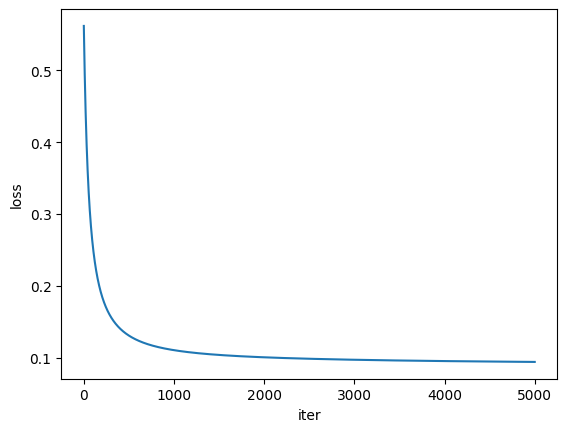

In [306]:
print(min(losses))
py.plot(range(5000),losses)
py.ylabel('loss')
py.xlabel('iter')

In [307]:
with torch.no_grad():
    y_predicted=model(x_test)
    y_predicted_cls=y_predicted.round()
    acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
print('Accuracy of model=',100*acc.item(),"%")
    

Accuracy of model= 98.57142567634583 %
